In [1]:
from __future__ import division
import os

import numpy as np
import pandas as pd
from numpy import sqrt
from scipy import integrate

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def journal():
    '''
    Appears nearly square. I like this best.
    'figure.figsize': [3.1, 2.6]
    
    Use: plt.tight_layout(pad=0.1, w_pad=0.0, h_pad=0.0)
    plt.xlabel('$E_{iso}$ $(erg)$',labelpad=-1)  
    plt.ylabel('$E^*_{pk}$ $(keV)$',labelpad=-2)
    
    '''
    params = {'backend': 'pdf',
              'axes.labelsize':  10,
              'font.size':       10,
              'legend.fontsize': 8,
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'text.usetex':     True,
              'figure.figsize': [4,3], #[4,3], #[3.1, 2.6], # [7,6]
              'font.family': 'serif',}
    plt.rcParams.update(params)

In [3]:
journal()

#### All luminosity distance functions must pass results in parsecs.

In [4]:
def LumDist_concordance(redshift):
    """
    This is the function we use in our work, but different cosmo constants 
    as well as DL units. 
    """
    z           = redshift
    H_knot      = 71               # Hubble Constant.  Units: km/s/Mpc
    omega_m     = 0.27             # Matter Density.
    omega_l     = 1.0 - omega_m
    c           = 2.99792458e5      # SPEED OF LIGHT    Units: km/s
    def Aint(z):
        return (1./(sqrt(((1.+z)*(1.+z)*(1. + omega_m * z))-(z*(2.+ z)*omega_l ))))
    AA      = integrate.quad(Aint, 0.0, z)
    DL_Mpc  = (c * (1. + z) / H_knot) * AA[0]
    DL_pc = DL_Mpc * (1E6) # convert Mpc to pc
    return DL_pc


def LumDist_wexpansion_1(redshift):
    """
    Lower order expansion. Equation 14 in Riess et al. 2004. 
    w(z) = w0 + w'z
    """
    z           = redshift
    H_knot      = 71               # Hubble Constant.  Units: km/s/Mpc
    omega_m     = 0.27             # Matter Density.
    omega_l     = 1.0 - omega_m
    c           = 2.99792458e5      # SPEED OF LIGHT    Units: km/s
    w0 = -1.31
    wp = 1.48   # p: prime symbol
    def Aint(z):
        return 1./np.sqrt( ((1.+z)**3)*omega_m + \
                         omega_l*((1.+z)**(3*(1+w0-wp)))*np.exp(3*wp*z) )
    AA      = integrate.quad(Aint, 0.0, z)
    DL_Mpc  = (c * (1. + z) / H_knot) * AA[0]
    DL_pc = DL_Mpc * (1E6) # convert Mpc to pc
    return DL_pc

def LumDist_weylgravity(redshift):
    """
    Weyl Gravity.
    Equation 237 in Mannheim 2006 paper
    q_knot      = -0.37 or -0.2
    """
    z           = redshift
    H_knot      = 71               # Hubble Constant.  Units: km/s/Mpc
    c           = 2.99792458e5      # SPEED OF LIGHT    Units: km/s
    q_knot      = -0.37
    DL_Mpc  = (-c * ((1. + z)**2) / (H_knot * q_knot)) * \
                (1-np.sqrt(1 + q_knot - (q_knot/((1+z)**2))))
    DL_pc = DL_Mpc * (1E6) # convert Mpc to pc
    return DL_pc

# def LumDist_wexpansion_2(redshift):
#     H_knot      = 71               # Hubble Constant.  Units: km/s/Mpc
#     omega_m     = 0.27             # Matter Density.
#     omega_l     = 1.0 - omega_m
#     c          = 2.99792458e5      # SPEED OF LIGHT    Units: km/s
#     w0 = -1.31
#     wa = 

#     z = redshift
#     def Aint(z):
#         return 1./np.sqrt( ((1.+z)**3)*omega_m + \
#                          omega_l*((1.+z)**(3*(1+w0+wa)))*np.exp(-3*wz*z/(1+z)) )
#     AA      = integrate.quad(Aint, 0.0, z)
#     DL_Mpc  = (c * (1. + z) / H_knot) * AA[0]
#     DL_pc = DL_Mpc * (1E6)
#     return DL_pc

    
def distance_modulus(lumdistance):
    return 5*np.log10(lumdistance)-5

In [5]:
redshifts = np.linspace(0, 7, 100)

luminositydistances = [LumDist_concordance(redshift=z) for z in redshifts]
ydata = [distance_modulus(lumdistance=dL) for dL in luminositydistances]
xdata = redshifts


luminositydistances = [LumDist_wexpansion_1(redshift=z) for z in redshifts]
ydata2 = [distance_modulus(lumdistance=dL) for dL in luminositydistances]
xdata2 = redshifts


luminositydistances = [LumDist_weylgravity(redshift=z) for z in redshifts]
ydata3 = [distance_modulus(lumdistance=dL) for dL in luminositydistances]
xdata3 = redshifts

/Users/KimiZ/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10


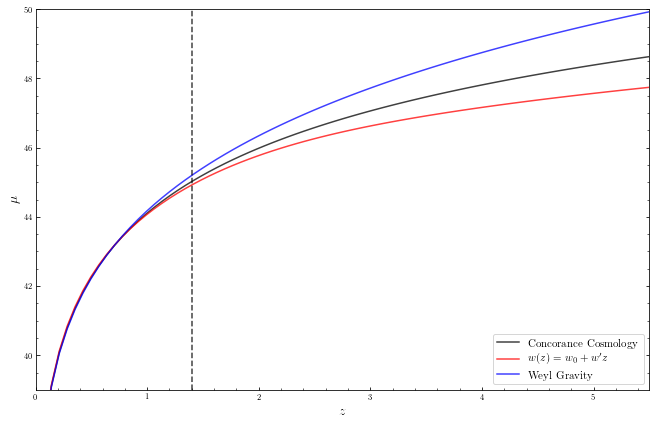

In [6]:
plt.clf()

plt.figure(figsize=(11,7))
plt.plot(xdata, ydata, color='k', alpha=0.75, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.75, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.75, label='Weyl Gravity') 
plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')
plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(39, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

# Add data from Schaefer 2007 (69 GRBs) and Kowalski et al 2008 (414 SN Ia)

In [7]:
# Supernovae data from Kowalski et al. 2008, table 11
df1 = pd.read_csv('Kowalski2008_table11.txt', 
                  sep='\t')

# GRB data from Schaefer 2007, table 6
df2 = pd.read_csv('Schaefer2007_table6.txt', 
                  sep='\t')

In [ ]:
plt.clf()

plt.figure(figsize=(11,8))
plt.plot(xdata, ydata, color='k', alpha=0.75, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.75, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.75, label='Weyl Gravity') 
plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

# Supernovae
plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
             fmt='o', markersize=5, color='mediumblue', ecolor='blue',
             lw=1, capsize=1, alpha=0.25, label='SN Ia')

# GRBs
plt.errorbar(df2.z, df2.maga, yerr=df2.maga_err, xerr=None, 
             fmt='d', color='red', ecolor='grey',
             lw=1, capsize=1, alpha=0.5, label='GRBs')

plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(35, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

In [10]:
df2.columns[2:]

Index([u'mag1', u'mag1_err', u'mag2', u'mag2_err', u'mag3', u'mag3_err',
       u'mag4', u'mag4_err', u'mag5', u'mag5_err', u'maga', u'maga_err',
       u'magb', u'magb_err'],
      dtype='object')

In [12]:
for col in df2.columns[2:]:
    if '_err' in col:
        pass
    else:
        df2[col], err = df2[col
        #print(df2[col])

mag1
mag2
mag3
mag4
mag5
maga
magb


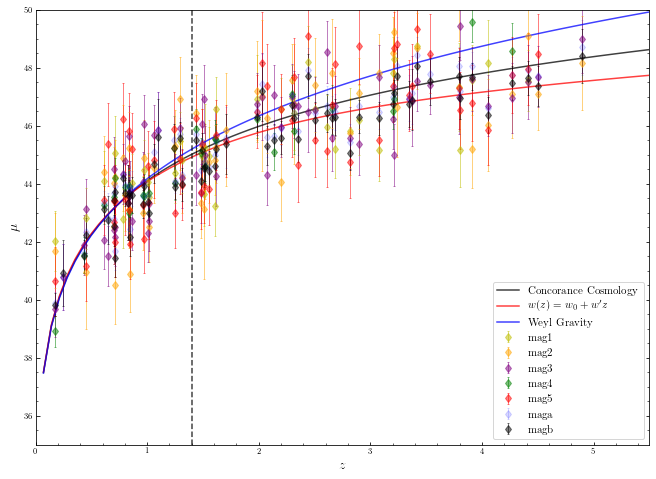

In [15]:
plt.clf()

plt.figure(figsize=(11,8))
plt.plot(xdata, ydata, color='k', alpha=0.75, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.75, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.75, label='Weyl Gravity') 
plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

# # Supernovae
# plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
#              fmt='o', markersize=5, color='mediumblue', ecolor='blue',
#              lw=1, capsize=1, alpha=0.25, label='SN Ia')

# GRBs
clr = 'y'
fmt = 'd'
plt.errorbar(df2.z, df2.mag1, yerr=df2.mag1_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='mag1')

clr = 'orange'
fmt = 'd'
plt.errorbar(df2.z, df2.mag2, yerr=df2.mag2_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='mag2')
clr = 'purple'
fmt = 'd'
plt.errorbar(df2.z, df2.mag3, yerr=df2.mag3_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='mag3')
clr = 'g'
fmt = 'd'
plt.errorbar(df2.z, df2.mag4, yerr=df2.mag4_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='mag4')
clr = 'r'
fmt = 'd'
plt.errorbar(df2.z, df2.mag5, yerr=df2.mag5_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='mag5')
clr = 'b'
fmt = 'd'
plt.errorbar(df2.z, df2.maga, yerr=df2.maga_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.15, label='maga')
clr = 'k'
fmt = 'd'
plt.errorbar(df2.z, df2.magb, yerr=df2.magb_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=1, alpha=0.5, label='magb')


plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(35, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

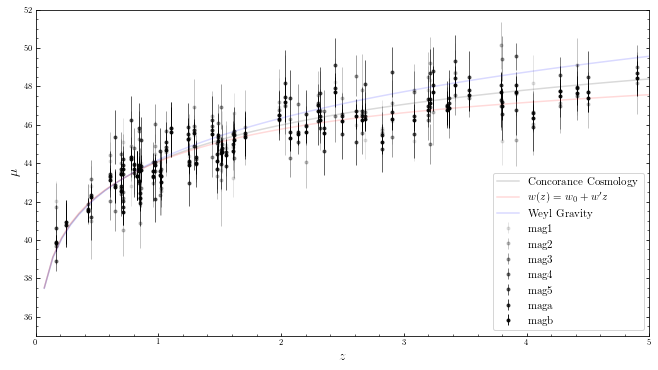

In [28]:
plt.clf()

plt.figure(figsize=(11,6))
plt.plot(xdata, ydata, color='k', alpha=0.15, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.15, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.15, label='Weyl Gravity') 
#plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

# # Supernovae
# plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
#              fmt='o', markersize=5, color='mediumblue', ecolor='blue',
#              lw=1, capsize=1, alpha=0.25, label='SN Ia')

# GRBs
clr = 'k'
fmt = '.'

alpha = 0.1
plt.errorbar(df2.z, df2.mag1, yerr=df2.mag1_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='mag1')

alpha = 0.22
plt.errorbar(df2.z, df2.mag2, yerr=df2.mag2_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='mag2')

alpha = 0.36
plt.errorbar(df2.z, df2.mag3, yerr=df2.mag3_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='mag3')

alpha = 0.49
plt.errorbar(df2.z, df2.mag4, yerr=df2.mag4_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='mag4')

alpha = 0.6
plt.errorbar(df2.z, df2.mag5, yerr=df2.mag5_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='mag5')

alpha = 0.72
plt.errorbar(df2.z, df2.maga, yerr=df2.maga_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='maga')

alpha = 0.9
plt.errorbar(df2.z, df2.magb, yerr=df2.magb_err, xerr=None, 
             fmt=fmt, color=clr, ecolor=clr,
             lw=1, capsize=0, alpha=alpha, label='magb')


plt.minorticks_on()
plt.xlim(0, 5)
plt.ylim(35, 52)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

In [30]:
print(df2.columns.tolist())

['GRB', 'z', 'mag1', 'mag1_err', 'mag2', 'mag2_err', 'mag3', 'mag3_err', 'mag4', 'mag4_err', 'mag5', 'mag5_err', 'maga', 'maga_err', 'magb', 'magb_err']


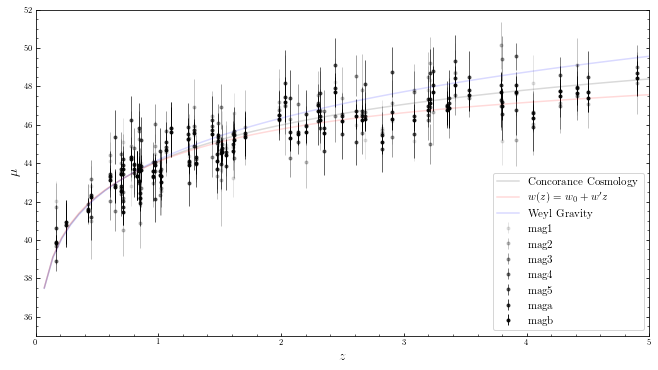

In [31]:
plt.clf()

plt.figure(figsize=(11,6))
plt.plot(xdata, ydata, color='k', alpha=0.15, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.15, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.15, label='Weyl Gravity') 
#plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

# # Supernovae
# plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
#              fmt='o', markersize=5, color='mediumblue', ecolor='blue',
#              lw=1, capsize=1, alpha=0.25, label='SN Ia')

# GRBs
clr = 'k'
fmt = '.'

alpha = 0.1

cols = ['mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'maga', 'magb']
alphas = [0.1, 0.22, 0.36, 0.49, 0.6, 0.72, 0.9]

for col,alpha in zip(cols, alphas):
    plt.errorbar(df2.z, df2[col], yerr=df2[col+'_err'], xerr=None, 
                 fmt=fmt, color=clr, ecolor=clr,
                 lw=1, capsize=0, alpha=alpha, label='%s'%col)


plt.minorticks_on()
plt.xlim(0, 5)
plt.ylim(35, 52)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

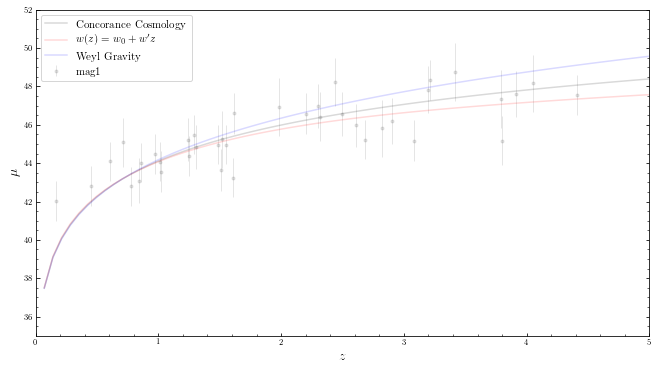

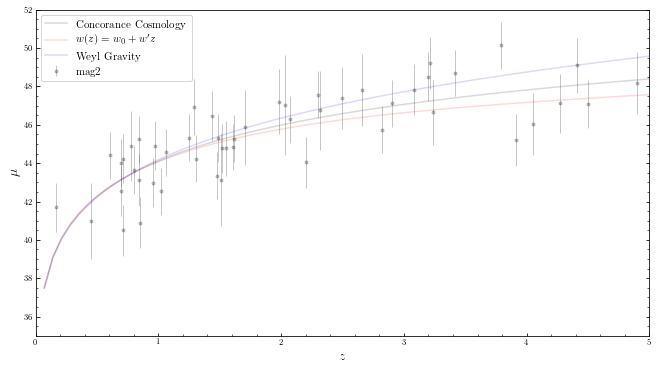

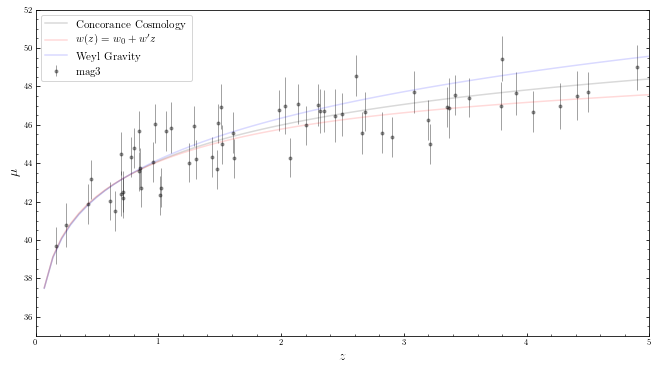

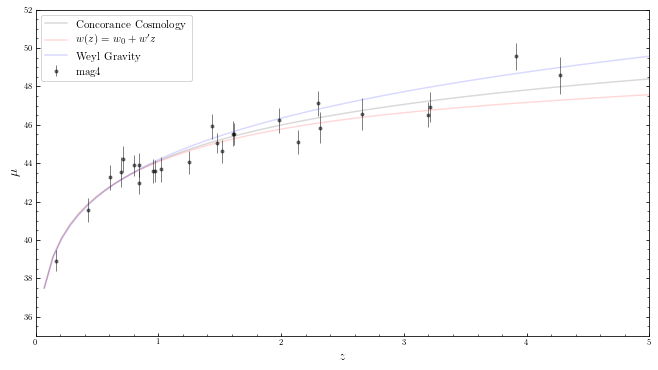

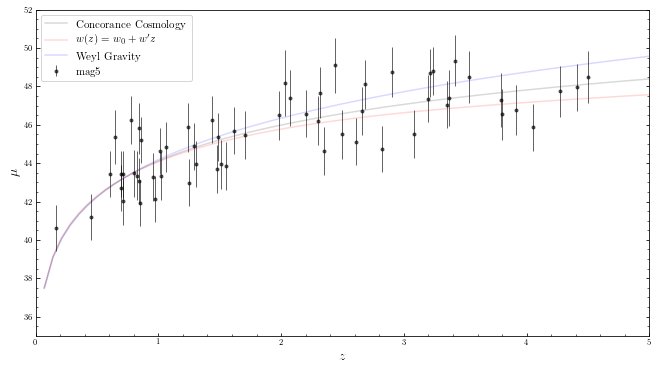

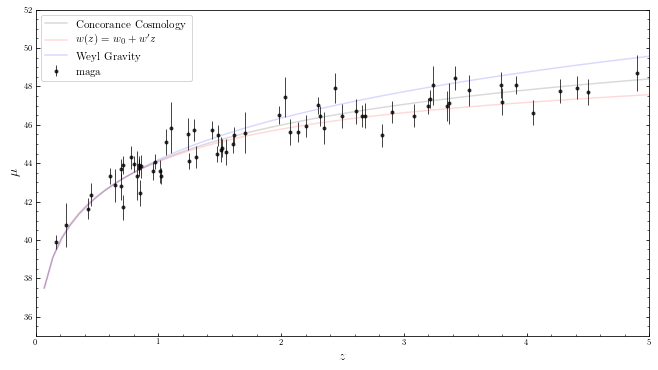

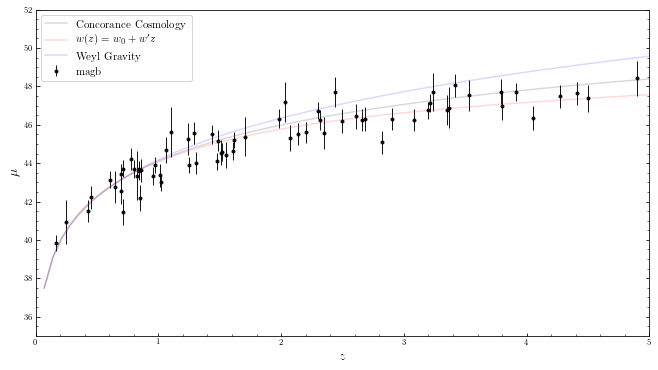

In [32]:

# # Supernovae
# plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
#              fmt='o', markersize=5, color='mediumblue', ecolor='blue',
#              lw=1, capsize=1, alpha=0.25, label='SN Ia')

# GRBs
clr = 'k'
fmt = '.'



cols = ['mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'maga', 'magb']
alphas = [0.1, 0.22, 0.36, 0.49, 0.6, 0.72, 0.9]

for col,alpha in zip(cols, alphas):
    plt.clf()
    plt.figure(figsize=(11,6))
    plt.plot(xdata, ydata, color='k', alpha=0.15, label='Concorance Cosmology')
    plt.plot(xdata2, ydata2, color='red', alpha=0.15, label="$w(z) = w_0 + w'z$")
    plt.plot(xdata3, ydata3, color='blue', alpha=0.15, label='Weyl Gravity') 
    #plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

    plt.errorbar(df2.z, df2[col], yerr=df2[col+'_err'], xerr=None, 
                 fmt=fmt, color=clr, ecolor=clr,
                 lw=1, capsize=0, alpha=alpha, label='%s'%col)

    plt.minorticks_on()
    plt.xlim(0, 5)
    plt.ylim(35, 52)
    plt.legend(loc=0, fontsize=11)
    plt.xlabel('$z$', fontsize=14)
    plt.ylabel('$\mu$', fontsize=14)
    plt.show()

### Plot for dissertation:

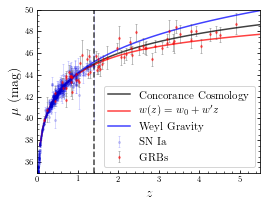

In [34]:
plt.clf()

plt.plot(xdata, ydata, color='k', alpha=0.75, label='Concorance Cosmology')
plt.plot(xdata2, ydata2, color='red', alpha=0.75, label="$w(z) = w_0 + w'z$")
plt.plot(xdata3, ydata3, color='blue', alpha=0.75, label='Weyl Gravity') 
plt.axvline(1.4, 0,1, alpha=0.75, color='k', ls='--')

# Supernovae
plt.errorbar(df1.z, df1.mag, yerr=df1.mag_err, xerr=None, 
             fmt='o', markersize=2, color='mediumblue', ecolor='blue',
             lw=1, capsize=1, alpha=0.15, label='SN Ia')

# GRBs
plt.errorbar(df2.z, df2.maga, yerr=df2.maga_err, xerr=None, 
             fmt='d', markersize=2, color='red', ecolor='grey',
             lw=1, capsize=1, alpha=0.5, label='GRBs')

plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(35, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$ (mag)', fontsize=14)
filename = ('/Users/KimiZ/Documents/MY_DISSERTATION/Thesis/Chapters/Figures/'
            'cosmologicalmodels_withData.pdf')
plt.savefig(filename)
#plt.show()

In [29]:
os.system('open %s'%filename)

0

In [30]:
df1.shape

(414, 12)

In [31]:
df2.shape

(69, 16)